# Study of bound states in a AlGaAs/GaAs quantum well with double barrier

In [2]:
# python standard
import time

# python extended
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

# our libraries
from solvers.algaas import BarriersWellSandwich

# default configurations
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20

## AlGaAs/GaAs helper

In our library we have the `BarriersWellSandwich` which allows for the creation of a structure of a well surrounded by barriers:

```
     ___             ___
____|   |___     ___|   |____
            |___|
```



If we make the barriers' height to be the same as the well's height, we get:

```
____________     ____________
            |___|
```

Text(0,0.5,'V (eV)')

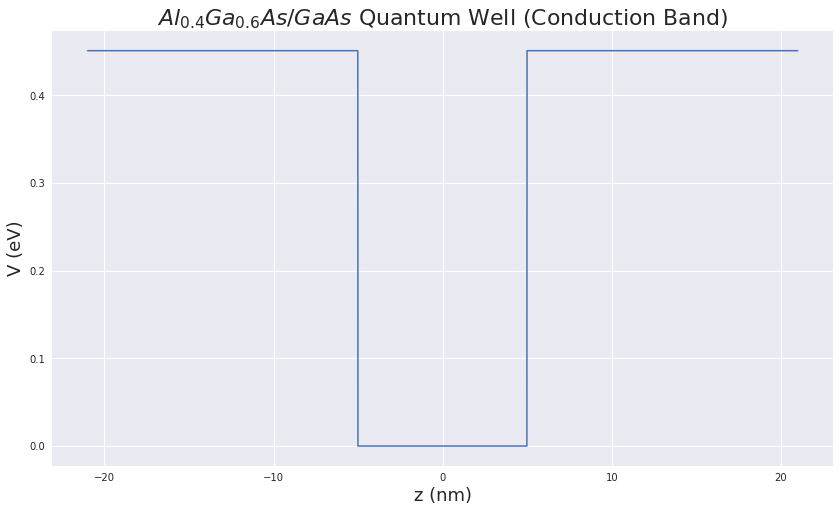

In [3]:
quantum_well = BarriersWellSandwich(b_l=1, d_l=1, w_l=10, 
                                    b_x=0.4, d_x=0.4, w_x=0.0, 
                                    surround=1, offset='well', 
                                    gap_distrib=(0.7, 0.3))
ax = quantum_well.device.plot('z_nm', 'v_ev', 
              legend=False, title='$Al_{0.4}Ga_{0.6}As/GaAs$ Quantum Well (Conduction Band)')
ax.set_xlabel('z (nm)')
ax.set_ylabel('V (eV)')

In [4]:
#quantum_well.time_evolution(steps=1000, dt=1e-19, imaginary=True, n=1, save=False, load=False, verbose=False)
quantum_well.calculate_eigenstates(n=3)

/home/thiago/Documents/master/msc/solvers/generic_potential.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%d: %.10e" % (s, self.values[s]))


0: 8.3353228410e-01
0: 5.5327466130e-01
0: 4.1405680667e-01
0: 3.3081532897e-01
0: 2.7544100396e-01
0: 2.3594652389e-01
0: 2.0635765593e-01
0: 1.8336303870e-01
0: 1.6497933152e-01
0: 1.4994621823e-01
0: 1.3742460657e-01
0: 1.2683443005e-01
0: 1.1776210051e-01
0: 1.0990502744e-01
0: 1.0303694232e-01
0: 9.6985438302e-02
0: 9.1616966817e-02
0: 8.6826544596e-02
0: 8.2530528192e-02
0: 7.8661440805e-02
0: 7.5164205538e-02
0: 7.1993362986e-02
0: 6.9110990498e-02
0: 6.6485129580e-02
0: 6.4088586272e-02
0: 6.1898008446e-02
0: 5.9893170702e-02
0: 5.8056416191e-02
0: 5.6372217889e-02
0: 5.4826831373e-02
0: 5.3408018048e-02
0: 5.2104822928e-02
0: 5.0907394812e-02
0: 4.9806839626e-02
0: 4.8795099761e-02
0: 4.7864853965e-02
0: 4.7009433507e-02
0: 4.6222751352e-02
0: 4.5499241770e-02
0: 4.4833808392e-02
0: 4.4221779145e-02
0: 4.3658866846e-02
0: 4.3141134477e-02
0: 4.2664964387e-02
0: 4.2227030796e-02
0: 4.1824275126e-02
0: 4.1453883753e-02
0: 4.1113267862e-02
0: 4.0800045150e-02
0: 4.0512023146e-02


/home/thiago/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


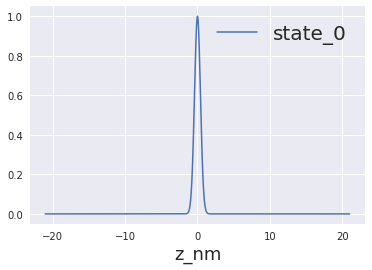

In [4]:
quantum_well.get_eigen_info(0)[0].plot('z_nm', 'state_0')

In [2]:
import numpy as np
import pandas as pd
from lib.algaas import BarriersWellSandwich

quantum_well = BarriersWellSandwich(b_l=1, d_l=1, w_l=10, 
                                    b_x=0.4, d_x=0.4, w_x=0.0, 
                                    surround=1, offset='well', 
                                    gap_distrib=(0.7, 0.3))

quantum_well.calculate_eigenstates(n=3)

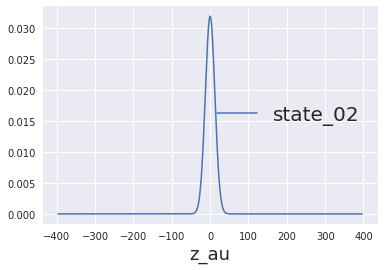

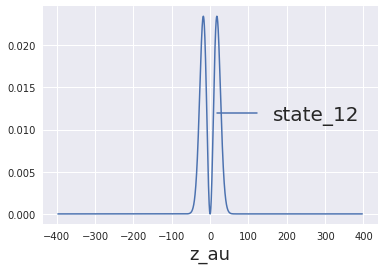

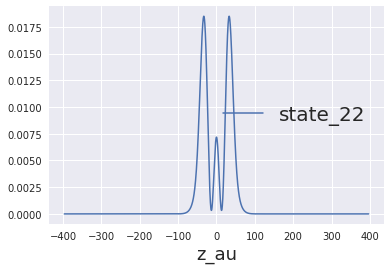

In [4]:
quantum_well.device['state_02'] = np.abs(quantum_well.device['state_0'])**2
quantum_well.device.plot('z_au', 'state_02')
quantum_well.device['state_12'] = np.abs(quantum_well.device['state_1'])**2
quantum_well.device.plot('z_au', 'state_12')
quantum_well.device['state_22'] = np.abs(quantum_well.device['state_2'])**2
quantum_well.device.plot('z_au', 'state_22')
plt.show()

In [6]:
quantum_well._eigenvalue_tool(quantum_well.device['state_1'].values)

5.0672471827928875

In [7]:
quantum_well.m_eff

array([0.067, 0.067, 0.067, ..., 0.067, 0.067, 0.067])